# 분석 및 예측할 데이터셋 불러오기

In [1]:
import pandas as pd
titanic = pd.read_csv('./train.csv') #Kaggle에서 다운받은 Titanic - Machine Learning from Disaster train파일을 받아온다.
df_test = pd.read_csv('./test.csv') #Kaggle에서 다운받은 Titanic - Machine Learning from Disaster test파일을 받아온다.
print(titanic) #출력 결과 이름, 성별, 승선지역 등 생존 여부와 상관관계가 없을 것 같은 데이터 들이 존재하는 것을 확인 할 수 있다.

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# 데이터 전처리

In [2]:
# 생존여부와는 상관 없을 것 같은 이름, 티켓 번호등의 컬럼을 지워준다.
titanic.drop(['PassengerId','Name', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True) 

# 테스트 데이터 프레임도 마찬가지로 생존여부와는 상관 없을 것 같은 이름, 티켓 번호등의 컬럼을 지워준다.
# 테스트 시 컬럼이 맞아야 예측이 가능하기 때문
df_test.drop(['PassengerId','Name', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [3]:
# Sex에 있는 문자열 형 데이터 male과 female은 LabelEncoder를 통해 라벨숫자로 변환한다.

from sklearn.preprocessing import LabelEncoder # 라벨링 하기 위해 라벨인코더를 불러와 준다.
Sex_encoder = LabelEncoder() #Sex를 라벨링할 라벨인코더를 정의합니다.
Sex_encoder.fit(titanic['Sex']) #라벨 인코더에 Sex값들을 넣어줍니다.
titanic['Sex'] = Sex_encoder.transform(titanic['Sex']) #인코딩한 값들을 Sex에 넣어줍니다.

#마찬가지로 테스트 데이터 프레임의 Sex컬럼도 encode 시켜준다.
test_Sex_encoder = LabelEncoder()
test_Sex_encoder.fit(df_test['Sex'])
df_test['Sex'] = test_Sex_encoder.transform(df_test['Sex'])

#인코딩이 되었는지 출력해서 확인해 본다.
print(Sex_encoder.classes_)
print(test_Sex_encoder.classes_)
print(titanic)

['female' 'male']
['female' 'male']
     Survived  Pclass  Sex   Age  Parch
0           0       3    1  22.0      0
1           1       1    0  38.0      0
2           1       3    0  26.0      0
3           1       1    0  35.0      0
4           0       3    1  35.0      0
..        ...     ...  ...   ...    ...
886         0       2    1  27.0      0
887         1       1    0  19.0      0
888         0       3    0   NaN      2
889         1       1    1  26.0      0
890         0       3    1  32.0      0

[891 rows x 5 columns]


<AxesSubplot:>

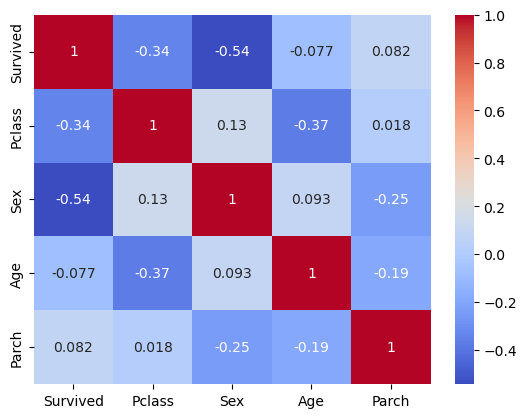

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(titanic.corr(), cmap='coolwarm', annot=True)
# 생존 여부와 상관 관계 확인 결과 (Parch)동승부모, 자식 수는 별 연관성이 없는 것 같아 삭제하기로 한다.

In [5]:
titanic.drop('Parch', axis = 1, inplace=True)

In [6]:
# 결측치 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [7]:
# Age 컬럼에 결측치가 177개나 있는게 확인 됨;;
print(f'퍼스트 클래스 승객 평균 나이 : ', titanic[titanic['Pclass'] == 1]['Age'].mean())
print(f'세컨드 클래스 승객 평균 나이 : ', titanic[titanic['Pclass'] == 2]['Age'].mean())
print(f'써드 클래스 승객 평균 나이 : ', titanic[titanic['Pclass'] == 3]['Age'].mean())

퍼스트 클래스 승객 평균 나이 :  38.233440860215055
세컨드 클래스 승객 평균 나이 :  29.87763005780347
써드 클래스 승객 평균 나이 :  25.14061971830986


In [8]:
# 좋은 클래스일 수록 돈이 많은 사람들이 탔을텐데, 나이 든 사람들은 그만큼 돈을 번 시간이 많았을테니
# 그만틈 많은 부를 축적해 놓았을 확률이 높을 것이다라는 예상은 확인 결과 사실인듯하다.
# 나는 결측치에 각 클래스의 평균 나이를 넣어주기로 결정 했다.
# 나이에 극단적 수치는 없을것 같아 중간 값으로 결정하지 않았다.


titanic[titanic['Pclass'] == 1]['Age'].fillna(titanic[titanic['Pclass'] == 1]['Age'].mean(), inplace = True)
titanic[titanic['Pclass'] == 2]['Age'].fillna(titanic[titanic['Pclass'] == 2]['Age'].mean(), inplace = True)
titanic[titanic['Pclass'] == 3]['Age'].fillna(titanic[titanic['Pclass'] == 3]['Age'].mean(), inplace = True)
titanic.isna().sum()
# 음..... 해당 인덱싱을 이용한 코드는 워닝이 뜨며 결측치가 채워지지 않은 걸 확인 할 수 있다.

/var/folders/fl/lytw3yqx5913yh2tcxgw3d740000gn/T/ipykernel_1613/3816547754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[titanic['Pclass'] == 1]['Age'].fillna(titanic[titanic['Pclass'] == 1]['Age'].mean(), inplace = True)
/var/folders/fl/lytw3yqx5913yh2tcxgw3d740000gn/T/ipykernel_1613/3816547754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[titanic['Pclass'] == 2]['Age'].fillna(titanic[titanic['Pclass'] == 2]['Age'].mean(), inplace = True)
/var/folders/fl/lytw3yqx5913yh2tcxgw3d740000gn/T/ipykernel_1613/3816547754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [9]:
# loc 메소드를 이용해서 해보기로 한다.

class1m = titanic.loc[titanic.Pclass == 1, 'Age'].mean()
class2m = titanic.loc[titanic.Pclass == 2, 'Age'].mean()
class3m = titanic.loc[titanic.Pclass == 3, 'Age'].mean()

In [10]:
titanic.loc[titanic.Pclass == 1, 'Age'].fillna(class1m, inplace = True)
titanic.loc[titanic.Pclass == 2, 'Age'].fillna(class2m, inplace = True)
titanic.loc[titanic.Pclass == 3, 'Age'].fillna(class3m, inplace = True)

In [11]:
titanic.isna().sum()
# 에러나 워닝은 발생하지 않는데 코드가 작동을 하지 않는다.;;

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [12]:
# isna에 직접 넣어주는 방식을 활용해보기로 한다.
titanic.loc[(titanic.Pclass == 1)&(titanic.Age.isna()), 'Age'] = class1m
titanic.loc[(titanic.Pclass == 2)&(titanic.Age.isna()), 'Age'] = class2m
titanic.loc[(titanic.Pclass == 3)&(titanic.Age.isna()), 'Age'] = class3m

In [13]:
titanic.isna().sum()
# isna에 직접 넣어주는 방식을 사용하니 잘 작동 한 것을 확인 할 수 있다.

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [14]:
titanic

,Survived,Pclass,Sex,Age
0,0,3,1,22.00000
1,1,1,0,38.00000
2,1,3,0,26.00000
3,1,1,0,35.00000
4,0,3,1,35.00000
...,...,...,...,...
886,0,2,1,27.00000
887,1,1,0,19.00000
888,0,3,0,25.14062
889,1,1,1,26.00000


In [15]:
# 생존 여부를 예측하는 모델을 만들기 위해 문제와 정답을 나눠 준다. 
# 여기서 답은 생존여부이다.

X = titanic.drop('Survived', axis=1)
y = titanic.Survived

# 지도학습 모델을 활용한 분석 및 예측

# DecisionTreeClassifier를 활용한 분석 및 예측

In [16]:
# scikit learn에서 제공하는 DecisionTreeClassifier를 불러온다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

In [17]:
from sklearn.tree import export_graphviz 
#그래프를 파일로 저장하기 위해 export_graphviz를 불러온다.

In [35]:
conda install graphviz
# pip install graphviz는 맥에서는 안먹는듯 하다.

Solving environment: done

## Package Plan ##

  environment location: /Users/iseung-won/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       h691a603_2         935 KB
    expat-2.4.9                |       he9d5cce_0         127 KB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         654 KB
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.5 MB
    fontconfig-2.13.1          |       hb62acd4_1         227 KB
    fonts-anaconda-1           |       h8fa9717_0           3 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    gdk-pixbuf-2.42.8          |       hec4cd9e_0     

In [36]:
import graphviz # 그래프 파일을 시각화 하기위해 graphviz를 불러온다.

In [37]:
# scikit learn에서 제공하는 DecisionTreeClassifier를 불러온다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [38]:
export_graphviz(dt, out_file='titanic_dectree.dot', 
                feature_names=X.columns,
                class_names=['사망', '생존'],
                filled=True,
                proportion=True,
                rounded=True)

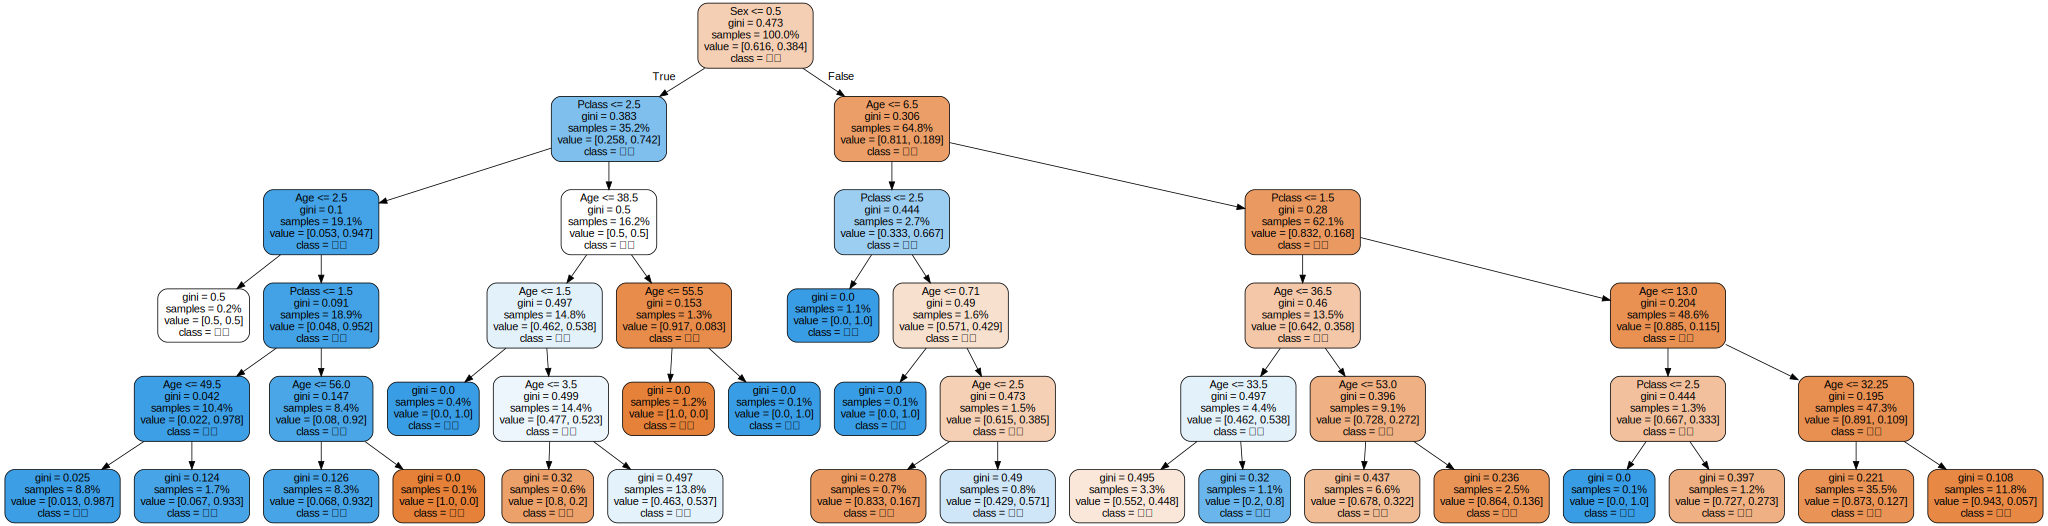

In [39]:


with open('./titanic_dectree.dot') as f:
    titanic_graph = f.read()
graphviz.Source(titanic_graph)

# graphviz를 사용하면 디씨전트리가 어떻게 학습을 했는지를 시각적으로 확인 할 수 있다.

In [40]:
#정확도를 확인하기 위해 훈련용 데이터와 테스트용 데이터를 4:1 비율로 분리한다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [41]:
# 하이퍼 파라미터 튜닝을 위해 hyperopt를 불러와 준다.
# gridsearchcv나 random search cv도 있지만 오늘은 hyperopt를 사용하겠다.
import hyperopt

In [42]:
df_test

,Pclass,Sex,Age,Parch
0,3,1,34.5,0
1,3,0,47.0,0
2,2,1,62.0,0
3,3,1,27.0,0
4,3,0,22.0,1
...,...,...,...,...
413,3,1,NaN,0
414,1,0,39.0,0
415,3,1,38.5,0
416,3,1,NaN,0


In [22]:
# hyperopt에서 fmin, tpe, hp, STATUS_OK, Trials를 불러온다.
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# 정확도를 예측하기 위해 accuracy_score를 불러와 준다.
from sklearn.metrics import accuracy_score

# 최적의 파라미터를 찾기 위한 범위 search_space를 정의해준다.
# hp.choice(파라미터 이름, 리스트) - 리스트의 값들중 하나를 선택하여 대입하며 최적의 파라미터를 찾는다.
# hp.quniform(파라미터 이름, start, end, 간격) - start부터 end까지 지정한 간격만큼 이동하며 최적의 파라미터를 찾는다.
search_space={'criterion':hp.choice('criterion', ['gini', 'entropy']),
              'max_depth':hp.quniform('max_depth', 3,13,2),,
              'max_features':hp.choice('max_features', ['auto', 'sqrt', 'log2']),
              'min_impurity_decrease':hp.quniform('min_impurity_decrease', 0, 1, 0.1),
              'ccp_alpha':hp.quniform('ccp_alpha', 0, 1, 0.1)}

def hyperparameter_tuning(search_space):
    

SyntaxError: invalid syntax (1551556722.py, line 10)

In [ ]:
DecisionTreeClassifier()